In [1]:
import glob
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


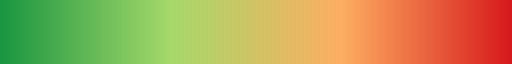

In [4]:
cmap

# Reading Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230918_FEP_exsitu'
subfolder = glob.glob(cwd + '/**Quinine**')
subfolder.sort()
# # del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230918_FEP_exsitu/Quinine


In [6]:
# dilute_list = [os.path.basename(i) for i in subfolder]
# dilute_list
# # np.float32(re.findall(r'\d+', dilute_list[0]))

In [7]:
# dilute_ratio = []
# for i in range(len(dilute_list)):
#     rates = np.float32(re.findall(r'\d+', dilute_list[i]))
#     # c = rates[:2].sum() / rates.sum()
#     c = 1/rates[-1]
#     dilute_ratio.append(c)
# dilute_ratio

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [8]:
df = pd.DataFrame()
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
# integration_time = ['300ms']

for i in range(len(subfolder)):
# for i in range(len(dilute_list)):
# for i in range(1):
    data_files = glob.glob(subfolder[i] + f'/**quinine**PL**.csv')
    data_files.sort()
    # del data_files[-1]
    suffix = os.path.basename(subfolder[i])
    # suffix = dilute_list[i]
    # id0 = 8
    # id1 = 22

    skiprows = 7 ## skip 23 rows if data processed by dioptas or ## 8
    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    for k in range(len(data_files)):        
        # df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
        # df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
        df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep=',')
        df_temp = pd.concat([df_temp, df_int['Fluorescence']], axis=1, ignore_index=False)

    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df[f'x_{suffix}'] = df_int['Wavelength']
    df[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

## Export PL of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [9]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df.to_csv('20230829_CsPbBr_PL.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [10]:
df

,x_Quinine,Quinine_mean
0,197.742294,2.222222
1,198.544478,3.777778
2,199.346597,1.444444
3,200.148650,0.000000
4,200.950637,2.111111
...,...,...
1039,990.769837,2.444444
1040,991.489165,0.111111
1041,992.208398,1.666667
1042,992.927537,2.777778


## Check data in pd dataframe

In [11]:
df.keys()

Index(['x_Quinine', 'Quinine_mean'], dtype='object')

In [12]:
df.shape

(1044, 2)

## Prepare keys for average scans in pd dataframe

In [13]:
keys_list = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_Quinine', 'Quinine_mean']

In [14]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title = keys_list[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

Quinine_mean


## Plot all PL scans together

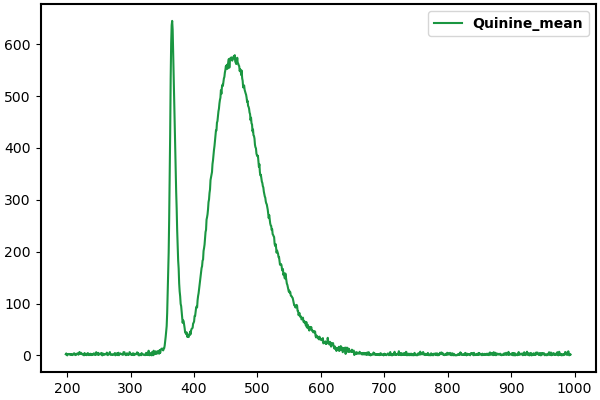

In [15]:
f1, ax1 = plt.subplots(1, 1, figsize = (6, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = 23

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    # t = re.findall(r'\d+', title[i])[-1]
    ax1.plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])
        
legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)
# ax1[1].legend(prop=legend_properties)

# ax1.set_xlim(-0.5, 20)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df[keys_list[0]], wavelength_range[1])

# ax1.axvline(w0)
# ax1.axvline(w1)

## Create new folder "plqy" for saving data

In [16]:
new_dir = cwd + '/plqy'

try:
    os.mkdir(new_dir)
except FileExistsError:
    pass

# if os.path.exists(new_dir):
#     pass
# else:
#     os.mkdir(new_dir)

## Integrate peak area

In [17]:
simpson_int = []
for i in range(len(title)):
    x = df[keys_list[i*2]][idx_w0:idx_w1]
    y = df[keys_list[i*2+1]][idx_w0:idx_w1]
    simpson_int.append(integrate.simpson(y, x))

df_int = pd.DataFrame()
df_int['Data_source'] = [title[i] for i in range(len(title))]
df_int['Simpson_integrate'] = simpson_int
df_int

,Data_source,Simpson_integrate
0,Quinine_mean,58445.974816


## Save Simpson integrate of PL peak

In [18]:
# df_int.to_csv(os.path.join(new_dir, 'quinine_300ms_FEP_simpson_integrate.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [19]:
# df_int.to_csv('quinine_300ms_FEP_simpson_integrate.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Absorbance

### Read Abs data into pandas dataframe

In [20]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df2 = pd.DataFrame()
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
# integration_time = ['20ms']

for i in range(len(subfolder)):
# for i in range(1):
    # data_files = subfolder
    data_files = glob.glob(subfolder[i] + f'/**quinine**Abs**.csv')
    data_files.sort()
    # del data_files[0]
    suffix = os.path.basename(subfolder[i])
    # suffix = dilute_list[i]
    # id0 = 8
    # id1 = 22

    skiprows = 7 ## skip 23 rows if data processed by dioptas or ## 8
    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    for k in range(len(data_files)):        
        # df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'Abs_{k:03d}'])
        # df_temp = pd.concat([df_temp, df_int[f'Abs_{k:03d}']], axis=1, ignore_index=False)
        df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep=',')
        df_temp = pd.concat([df_temp, df_int['Absorbance']], axis=1, ignore_index=False)

    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df2[f'x_{suffix}'] = df_int['Wavelength']
    df2[f'{suffix}_mean'] = df_temp.mean(axis=1)


In [21]:
i

0

## Export Absorbance of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [22]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df2.to_csv('20230829_CsPbBr_abs.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [23]:
df2

,x_Quinine,Quinine_mean
0,197.742294,0.418343
1,198.544478,-0.112704
2,199.346597,-0.344809
3,200.148650,-0.036984
4,200.950637,-0.010212
...,...,...
1039,990.769837,-0.029040
1040,991.489165,0.025726
1041,992.208398,-1.156347
1042,992.927537,-0.858671


## Prepare keys for average scans in pd dataframe

In [24]:
keys_list2 = list(df2.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list2

['x_Quinine', 'Quinine_mean']

In [25]:
# title = [os.path.basename(subfolder_Abs[i]) for i in range(len(subfolder_Abs))]
title = keys_list2[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

Quinine_mean


## Plot all Abs scans together

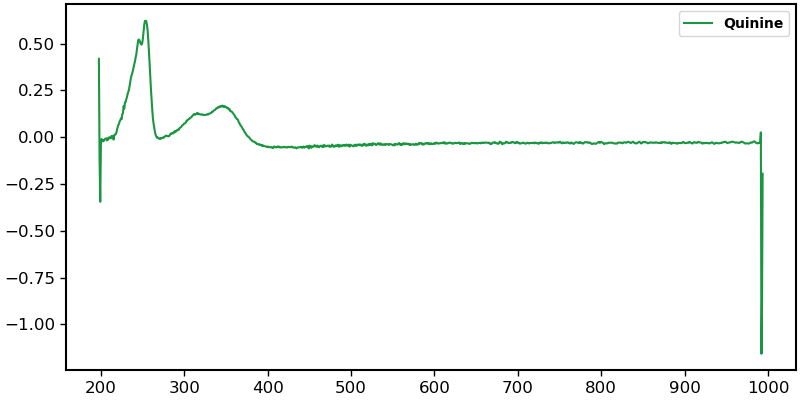

In [26]:
f2, ax2 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax2.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(prop=legend_properties)

# ax2.set_xlim(-0.5, 20)
# ax2.set_ylim(2500, 9500)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Try linear fitting

In [27]:
def line_2D(x, slope, y_intercept):
    y = x*slope + y_intercept
    return y


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def fit_line_2D(x, y, fit_function, x_range=[500, 900], maxfev=10000, plot=True):
    x = np.asarray(x)
    y = np.asarray(y)
    y = np.nan_to_num(y, nan=0)
    
    try:        
        idx0, _ = find_nearest(x, x_range[0])
        idx1, _ = find_nearest(x, x_range[1])
    except (TypeError, IndexError):
        idx0 = 0
        idx1 = -1
    
    slope = (y[idx1]-y[idx0]) / (x[idx1]-x[idx0])
    y_intercept = np.mean(y[idx0:idx1])
    
    try:
        initial_guess = [slope, y_intercept]
    except (TypeError, IndexError):
        initial_guess = [0.01, 0]
    
    try:
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
    except RuntimeError:
        maxfev=1000000
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
        
    if plot:
        plt.figure()
        plt.plot(x, y, label='data')
        plt.plot(x, fit_function(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        plt.legend()
    
    return popt, pcov


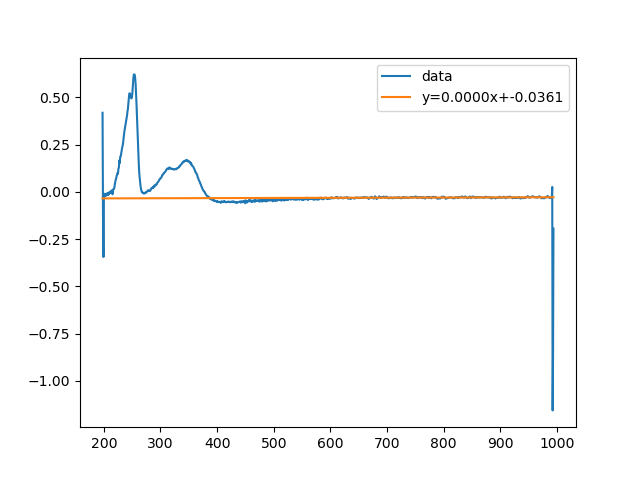

In [28]:
x = df2[keys_list2[-2]]
y = df2[keys_list2[-1]]
x_range=[700, 900]
idx0, v0 = find_nearest(x, x_range[0])
idx1, v1 = find_nearest(x, x_range[1])
popt, pcov = fit_line_2D(x,y,line_2D, x_range=[700, 900])

In [29]:
title.append('dummy')
title.append('dummy')
title.append('dummy')
title

['Quinine_mean', 'dummy', 'dummy', 'dummy']

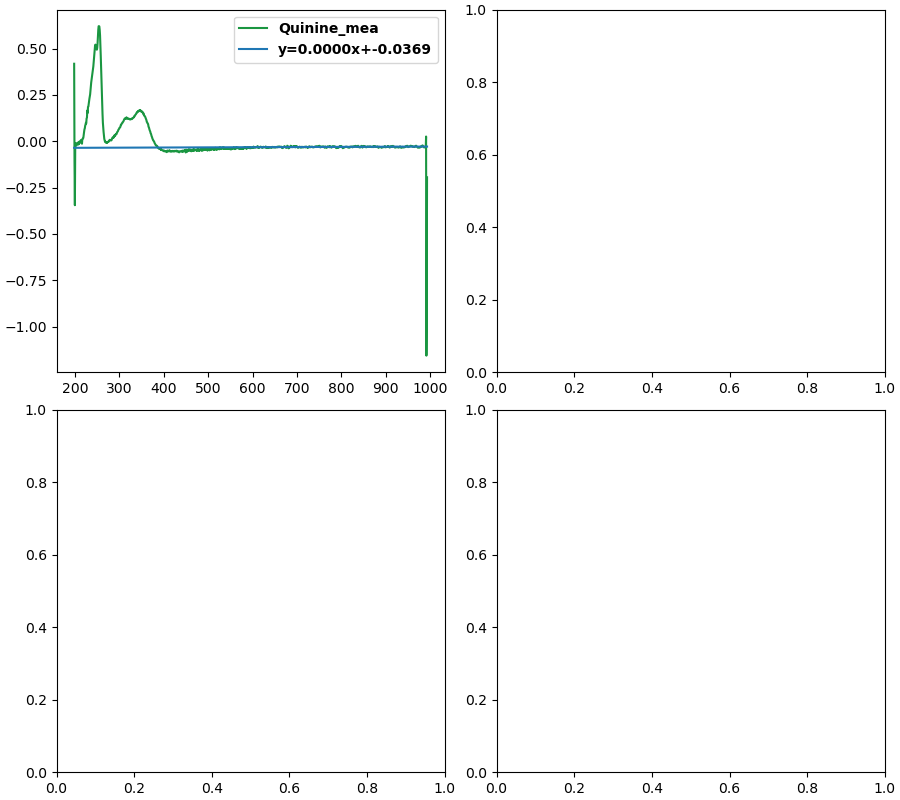

In [30]:
rows = 2
cols = 2
f3, ax3 = plt.subplots(rows, cols, figsize = (9, 8), constrained_layout=True)

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 0
id1 = -1
x_range_list = [[600, 900], [600, 900], 
                [600, 900], [600, 900], 
                [400, 900], [800, 900],
               ]

legend_properties = {'weight':'bold', 'size':10}
df4 = pd.DataFrame()
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    try:
        x = df2[keys_list2[i*2]]
        y = df2[keys_list2[i*2+1]]
        popt, pcov = fit_line_2D(x, y, line_2D, x_range=x_range_list[0], plot=False)
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, y, color=cmap(color_idx[i]), label=label[i][:id1])
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, line_2D(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        ax3[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)
        df4[keys_list2[i*2]] = x
        # df4[keys_list2[i*2+1]] = y - popt[1]
        df4[keys_list2[i*2+1]] = y - line_2D(x, *popt)
    
    except (KeyError, IndexError):
        pass

# # ax3.set_xlim(-0.5, 20)
# # ax3.set_ylim(2500, 9500)
# # ax3.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# # ax3.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax3.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax3.spines["bottom"].set_linewidth(spinewidth)
# ax3.spines["right"].set_linewidth(spinewidth)
# ax3.spines["top"].set_linewidth(spinewidth)
# ax3.spines["left"].set_linewidth(spinewidth)

In [31]:
title = keys_list2[1::2]
title

['Quinine_mean']

## Plot Abs by offset

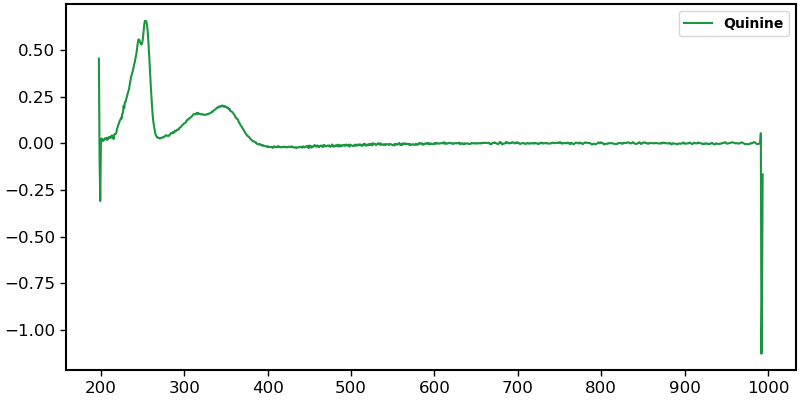

In [32]:
f4, ax4 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax4.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax4.plot(df4[keys_list2[i*2]], df4[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax4.legend(prop=legend_properties)

# ax4.set_xlim(-0.5, 20)
# ax4.set_ylim(2500, 9500)
# ax4.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax4.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax4.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax4.spines["bottom"].set_linewidth(spinewidth)
ax4.spines["right"].set_linewidth(spinewidth)
ax4.spines["top"].set_linewidth(spinewidth)
ax4.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for offset data in pd dataframe

In [33]:
keys_list4 = list(df4.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list4

['x_Quinine', 'Quinine_mean']

## Save offset data as csv

In [34]:
for i in range(len(title)):
    df_temp = pd.DataFrame()
    df_temp['Wavelength'] = df4[keys_list4[i*2]].fillna(0)
    df_temp['Absorbance'] = df4[keys_list4[i*2+1]].fillna(0)
    fn = title[i][:id1] + '_offset.csv'
    print(fn)
    # df_temp.to_csv(os.path.join(new_dir, fn), index=False, sep=',', float_format='{:.8e}'.format)

Quinine_offset.csv


## Save Absorbance at 365 nm

In [35]:
idx_365, w365 = find_nearest(df4[keys_list2[0]], 365)
# df4.iloc[idx_365][::-2][::-1].to_list()

df_365 = pd.DataFrame()
df_365['Data_source'] = [title[i] for i in range(len(title))]
df_365['Abs_365'] = df2.iloc[idx_365][1::2].to_list()
df_365['Abs_offset_365'] = df4.iloc[idx_365][1::2].to_list()
df_365

,Data_source,Abs_365,Abs_offset_365
0,Quinine_mean,0.090247,0.12406


In [36]:
# df_365.to_csv(os.path.join(new_dir, 'quinine_300ms_FEP_abs_365.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [37]:
# df_365.to_csv('quinine_300ms_FEP_abs_365.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [38]:
df2.keys()

Index(['x_Quinine', 'Quinine_mean'], dtype='object')